# Wine Data

## Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')
#sns.set(context='notebook', palette='dark', color_codes=True)

## Data Quality Check

Database obtained at:

    P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
    Modeling wine preferences by data mining from physicochemical properties.
    In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

    Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                  [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                  [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

In [2]:
df_red_wine = pd.read_csv('data\winequality-red.csv', sep=';')

Dataset preview

In [3]:
df_red_wine.head(6)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


### Check for Null / Missing Values

In [4]:
df_red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


No missing values are observed.

In [5]:
df_red_wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df_red_wine.shape

(1599, 12)

### Check for Duplicates

In [7]:
df_copy = df_red_wine.copy()
df_copy.drop_duplicates(inplace = True)

In [8]:
print("Total of {} duplicated records removed.".format(df_red_wine.shape[0] - df_copy.shape[0]))
df_copy.shape

Total of 240 duplicated records removed.


(1359, 12)

In [9]:
df_red_wine = df_copy
del df_copy

## Exploratory Data Analysis

In [10]:
df_red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Let's visualize each variable in a Histogram:

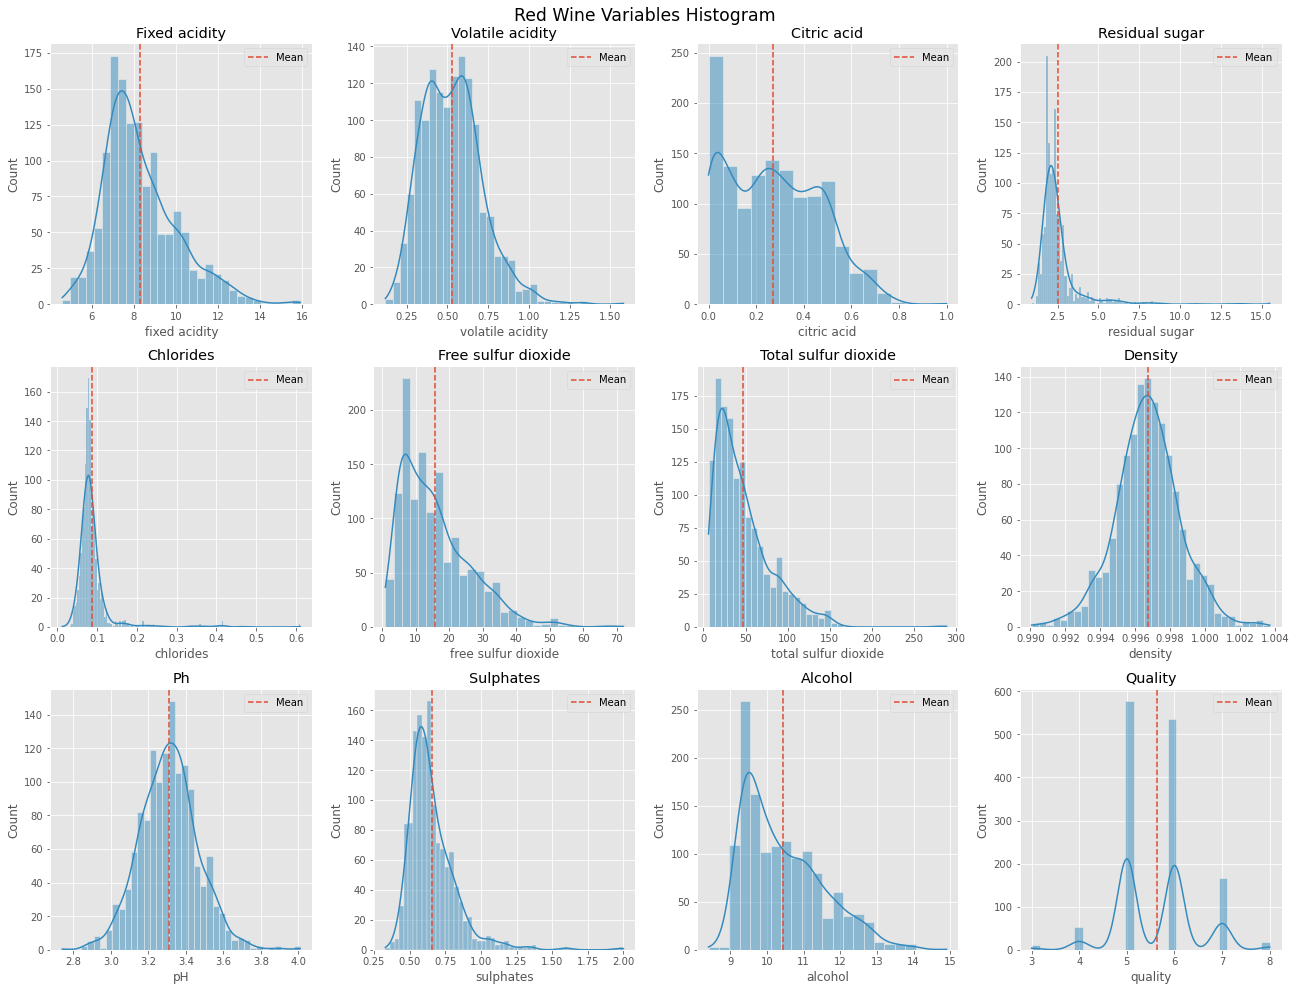

In [73]:
fig_rows, fig_columns = 3, 4
fig, axes = plt.subplots(fig_rows, fig_columns, figsize=(18,14))
fig.suptitle("Red Wine Variables Histogram", size='xx-large')

for i, column in enumerate(df_red_wine.columns):
    ax = axes[i//fig_columns][i%fig_columns]
    sns.histplot(data = df_red_wine, x = column, ax=ax, kde=True)
    ax.axvline(x=np.mean(df_red_wine[column]), linestyle='dashed', label='Mean')
    ax.set_title(column.capitalize())
    ax.legend()

plt.tight_layout()
plt.show()

Let's verify the correlations between the variables

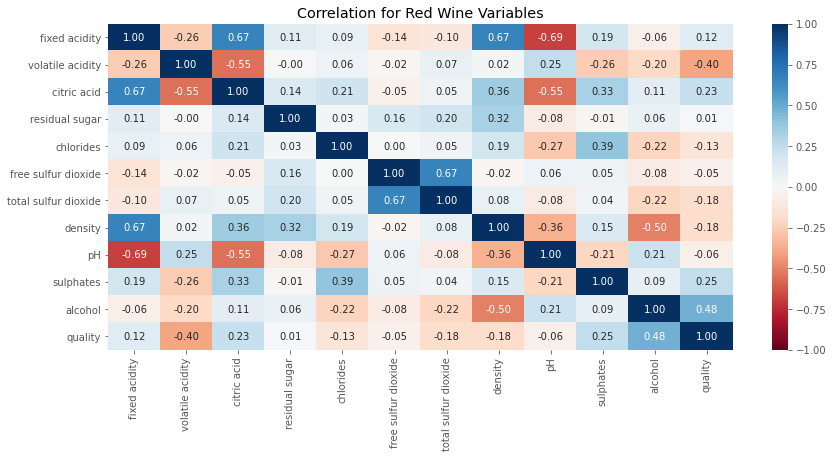

In [74]:
cor = df_red_wine.corr()

plt.figure(figsize=(14,6))

sns.heatmap(cor, vmin = -1, vmax = 1, annot = True, cmap = 'RdBu', fmt = ".2f")

plt.title("Correlation for Red Wine Variables")

plt.show()

Plotting charts for itens where |correlation| >= 0.5

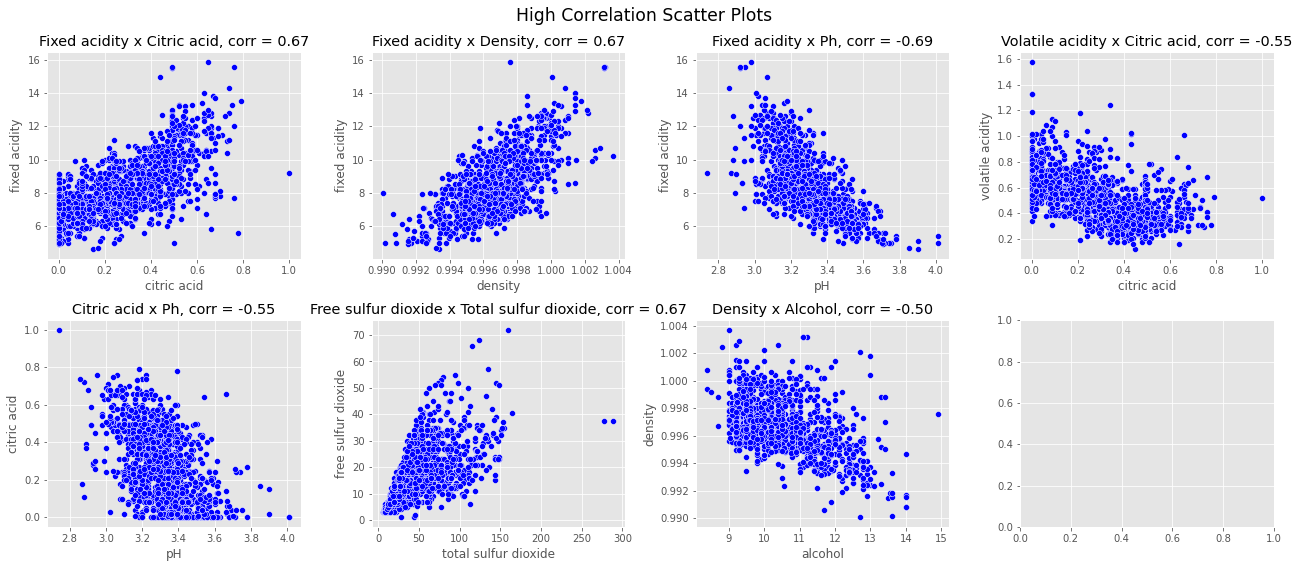

In [98]:
high_corr_pair_list = []

for i, line in enumerate(df_red_wine.columns):
    for column in df_red_wine.columns[i+1:]:
        if np.abs(cor.loc[line, column]) >= 0.5:
            high_corr_pair_list.append([line, column])
            
            
fig_rows, fig_columns = 2, 4
fig, axes = plt.subplots(fig_rows, fig_columns, figsize=(18,8))
fig.suptitle("High Correlation Scatter Plots", size='xx-large')

for i, pair in enumerate(high_corr_pair_list):
    ax = axes[i//fig_columns][i%fig_columns]
    cor_i = cor.loc[pair[0], pair[1]]
    
    sns.scatterplot(data = df_red_wine, x = pair[1], y = pair[0], ax = ax, color='blue')
    ax.set_title(str(pair[0]).capitalize() + " x " + str(pair[1]).capitalize() + ", corr = {:.2f}".format(cor_i) )
    
plt.tight_layout()
plt.show()